This Notebook contains the Socio-Demographic Segmentation of Electric Market in India.

Dataset contains the Age, Profession, Marrital status, No of Dependents, Personal loan, Total Salary and Price(Amount willing to pay for EV)

In [1]:
## Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

## DATA COLLECTION & ANALYSIS

In [2]:
customer_data = pd.read_csv('customer_data.csv')
customer_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [3]:
customer_data_original = customer_data.copy()

In [4]:
customer_data.shape

(99, 8)

In [5]:
#Getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


In [6]:
customer_data.describe()

,Age,No of Dependents,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,2.270707e+06,1.194040e+06
std,6.246054,1.335265,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.700000e+06,1.500000e+06
max,51.000000,4.000000,5.200000e+06,3.000000e+06


In [7]:
# Checking for missing values
customer_data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
Total Salary        0
Price               0
dtype: int64

In [8]:
customer_data.mean(axis=0)

Age                 3.631313e+01
No of Dependents    2.181818e+00
Total Salary        2.270707e+06
Price               1.194040e+06
dtype: float64

we can see that there are no null values present in our dataset

## Data Visualization

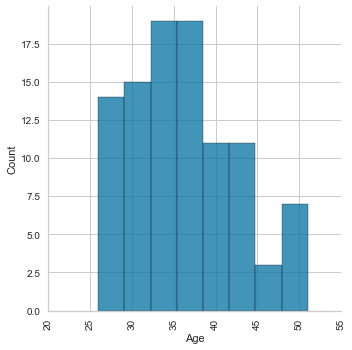

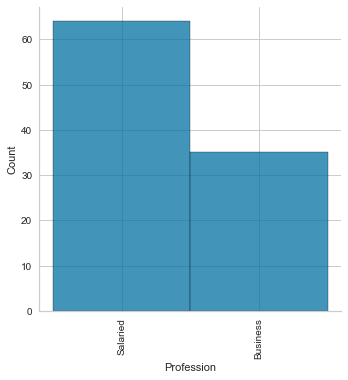

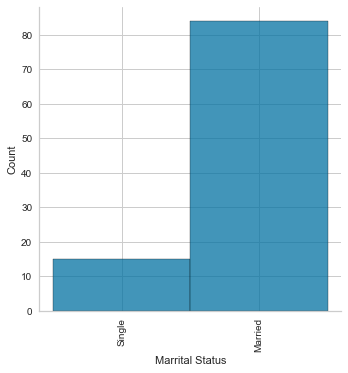

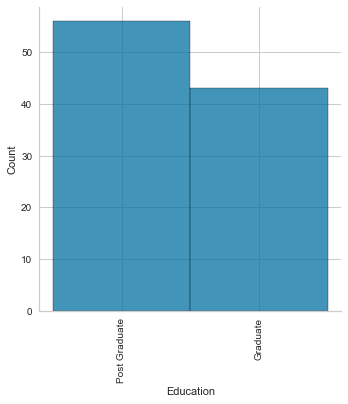

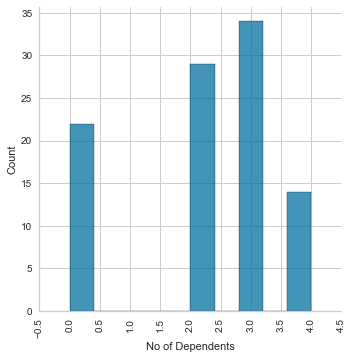

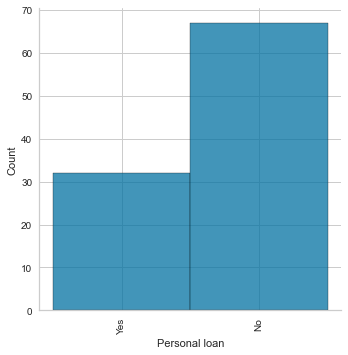

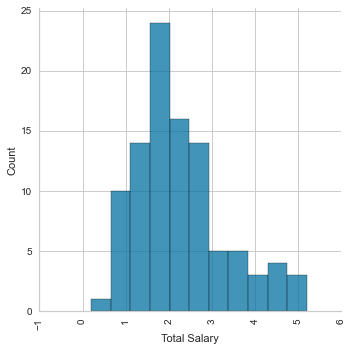

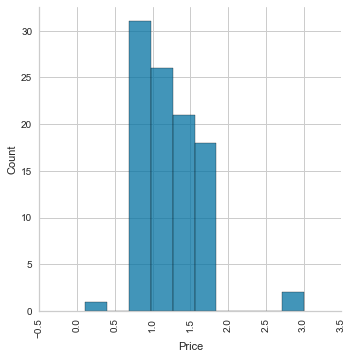

In [9]:
for col in customer_data.columns:
    ax= sns.displot(customer_data[col])
    ax.set_xticklabels(rotation=90)

<AxesSubplot:xlabel='Age', ylabel='count'>

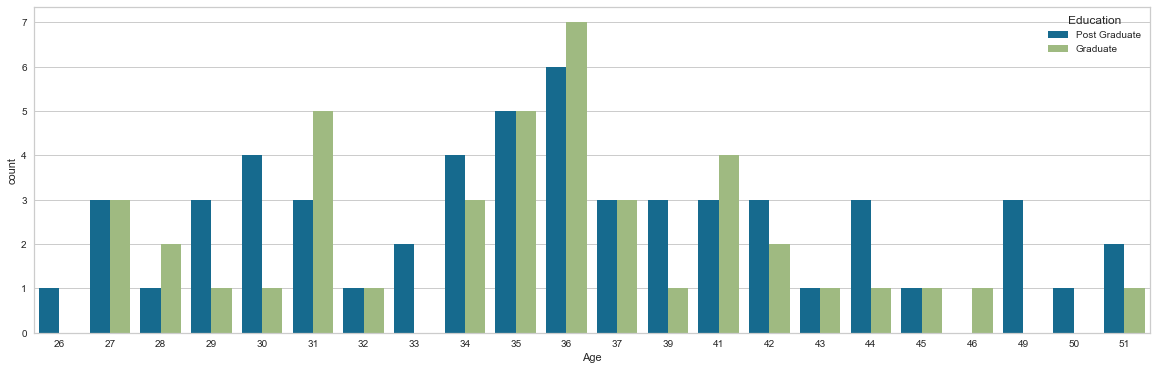

In [10]:
plt.figure(figsize=(20,6))
sns.countplot(x="Age", data=customer_data, hue="Education")

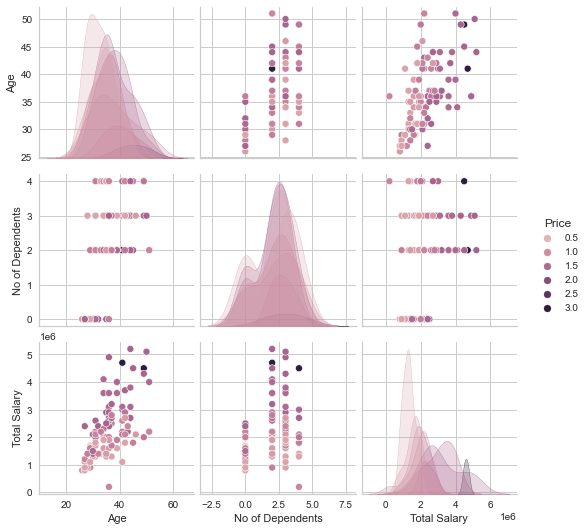

In [11]:
sns.pairplot(customer_data,hue="Price")

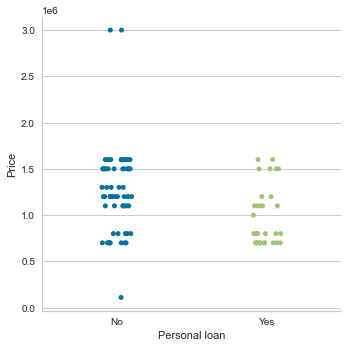

In [12]:
sns.catplot(data=customer_data, x="Personal loan", y="Price", order=["No", "Yes"])

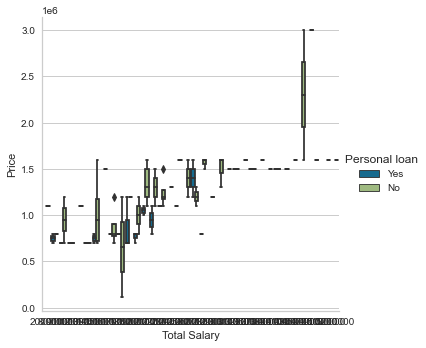

In [13]:
sns.catplot(data=customer_data, x="Total Salary",y = "Price",hue="Personal loan", kind="box")

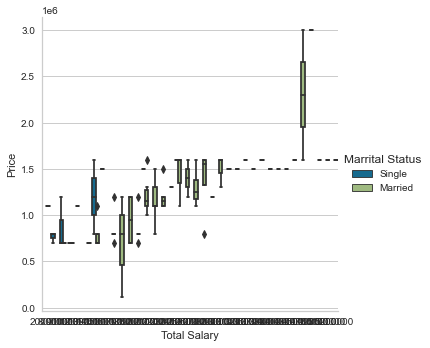

In [14]:
sns.catplot(data=customer_data, x="Total Salary",y = "Price",hue="Marrital Status", kind="box")

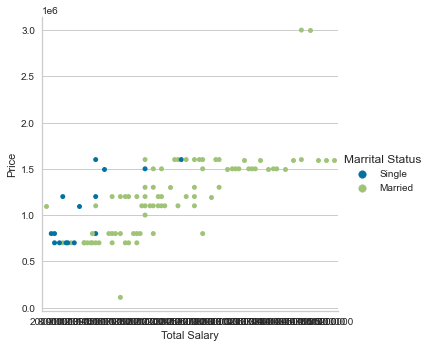

In [15]:
sns.catplot(data=customer_data, x="Total Salary", y="Price", hue="Marrital Status", kind="swarm")

## Encoding and Scaling the dataset

In [16]:
def label_encode(data,column):
        label_encoder=LabelEncoder()
        return label_encoder.fit_transform(data[column].astype(str))

In [17]:
customer_data['Marrital Status']= label_encode(customer_data,'Marrital Status')
customer_data['Education']= label_encode(customer_data,'Education')
customer_data['Personal loan']= label_encode(customer_data,'Personal loan')
customer_data['Profession']= label_encode(customer_data,'Profession')

In [18]:
customer_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,1,1,1,0,1,800000,800000
1,35,1,0,1,2,1,2000000,1000000
2,45,0,0,0,4,1,1800000,1200000
3,41,0,0,1,3,0,2200000,1200000
4,31,1,0,1,2,1,2600000,1600000


In [19]:
 customer_data_scaled = customer_data.copy()

scaler = StandardScaler()
scaled_columns = scaler.fit_transform(customer_data_scaled[['Age','No of Dependents', 'Total Salary','Price']])
customer_data_scaled[['Age', 'Total Salary','No of Dependents','Price']] = scaled_columns

In [20]:
customer_data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,1,1,1,0,1,800000,800000
1,35,1,0,1,2,1,2000000,1000000
2,45,0,0,0,4,1,1800000,1200000
3,41,0,0,1,3,0,2200000,1200000
4,31,1,0,1,2,1,2600000,1600000


In [21]:
customer_data_scaled.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,-1.498630,1,1,1,-1.406760,1,-1.642313,-0.904843
1,-0.211304,1,0,1,-0.258937,1,-0.136859,-0.445579
2,1.397855,0,0,0,-0.450240,1,1.368594,0.013685
3,0.754191,0,0,1,-0.067633,0,0.615867,0.013685
4,-0.854967,1,0,1,0.314975,1,-0.136859,0.932213


##  PCA (Principal Component Analysis)

In [22]:
PCA_customer = PCA(n_components=8)
PCA_customer_data = PCA_customer.fit_transform(customer_data_scaled)

In [23]:
PCA_customer_data= pd.DataFrame(data = PCA_customer_data,columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
PCA_customer_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-2.755424,0.751397,0.327292,0.502064,-0.317983,-0.467348,0.596780,-0.201394
1,-0.508214,-0.243122,0.255531,0.674233,-0.136693,-0.228612,0.367047,0.283960
2,0.955436,-1.703391,0.029488,-0.871207,0.313897,-0.439172,0.618963,0.004078
3,0.623580,-0.682814,0.086385,-0.531351,-0.577077,0.446721,0.092160,0.030198
4,0.134146,0.838959,-0.710967,0.785989,-0.047865,-0.237832,0.663670,0.410037


In [24]:
PCA_customer_data.std(axis=0)

PC1    1.546342
PC2    1.065657
PC3    0.624665
PC4    0.548355
PC5    0.497921
PC6    0.425824
PC7    0.406828
PC8    0.241439
dtype: float64

In [25]:
# Results from principal components analysis indicate that the first two componentscapture about 50% of the information contained in the segmentation variables.
PCA_customer.explained_variance_ratio_

array([0.49092503, 0.23315185, 0.0801122 , 0.06173457, 0.05090077,
       0.03722752, 0.03398014, 0.01196792])

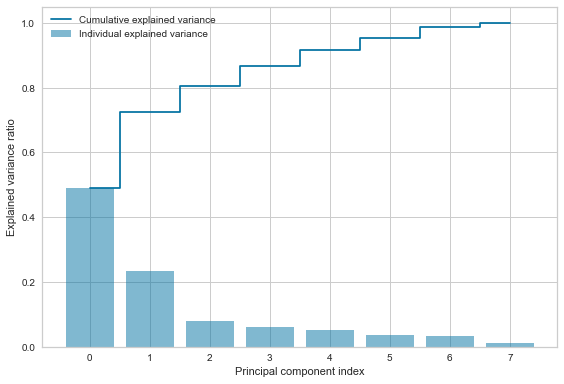

In [26]:
exp_var_pca = PCA_customer.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

To understand how each feature impact each principal component (PC), we will show the correlation between the features and the principal components created with PCA.

In [27]:
# The loadings indicate how the original variables are combined to form principalcomponents

# Principal components correlation coefficients
loadings = PCA_customer.components_
 
# Number of features before PCA
n_features = PCA_customer.n_features_
 
# Feature names before PCA
feature_names = customer_data_scaled.columns
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
feature_names,,,,,,,,
Age,0.540809,-0.294137,0.634300,-0.348251,-0.164234,-0.260298,-0.007339,-0.051105
Profession,0.034498,0.086749,0.044509,0.597181,-0.066970,-0.651347,-0.448352,-0.054050
Marrital Status,-0.132629,0.139172,0.001010,-0.060363,-0.090669,-0.114090,0.229160,-0.941087
Education,0.030477,0.023231,0.100643,0.385639,-0.834052,0.268920,0.254240,0.084176
No of Dependents,0.567538,0.298910,0.160012,0.419937,0.364564,0.473339,-0.045357,-0.166097
Personal loan,-0.041306,-0.163557,0.123834,0.332656,0.322638,-0.301275,0.790933,0.158466
Total Salary,0.362262,-0.704237,-0.567459,0.130133,-0.027262,0.043773,-0.029917,-0.174121
Price,0.482469,0.523452,-0.471809,-0.256503,-0.164111,-0.325462,0.230753,0.136818


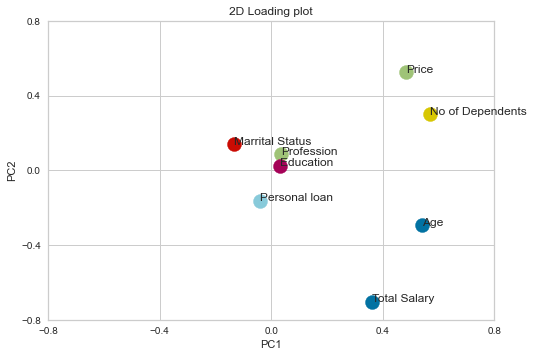

In [28]:
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot')
plt.show()

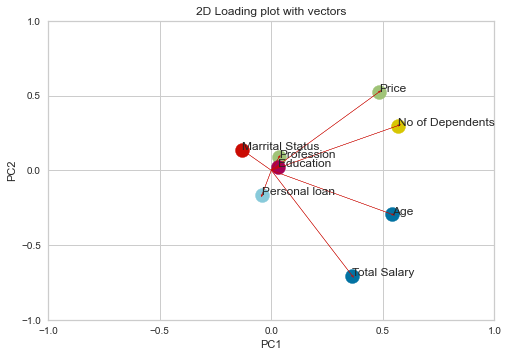

In [29]:
# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
# Define the axes
xticks = np.linspace(-1.0, 1.0, num=5)
yticks = np.linspace(-1.0, 1.0, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot with vectors')
plt.show()

In [30]:
pca_customer_scaled = PCA_customer_data.copy()
 
scaler_df = PCA_customer_data[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())
 
for index in scaler.index:
    pca_customer_scaled[index] *= scaler[index]
 
pca_customer_scaled

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.354785,0.161477,0.327292,0.502064,-0.317983,-0.467348,0.596780,-0.201394
1,-0.065437,-0.052248,0.255531,0.674233,-0.136693,-0.228612,0.367047,0.283960
2,0.123021,-0.366063,0.029488,-0.871207,0.313897,-0.439172,0.618963,0.004078
3,0.080291,-0.146739,0.086385,-0.531351,-0.577077,0.446721,0.092160,0.030198
4,0.017272,0.180295,-0.710967,0.785989,-0.047865,-0.237832,0.663670,0.410037
...,...,...,...,...,...,...,...,...
94,-0.131874,0.477954,-0.563547,-0.641939,0.516860,0.342874,0.354449,-0.392842
95,0.445346,0.061872,1.060003,0.490738,-0.021369,0.432451,-0.280684,-0.432928
96,0.133725,-0.200508,1.665749,-1.183778,0.373541,-0.500547,0.586574,0.121900
97,0.330287,0.072200,1.529196,-0.046200,-0.373176,-0.065682,-0.264610,-0.166742


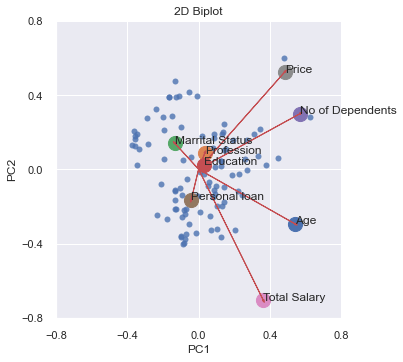

In [31]:
sns.set()
 
xs = loadings[0]
ys = loadings[1]
 
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_customer_scaled, 
    fit_reg=False, 
    )
 
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color='r', 
        head_width=0.01
        )
    plt.text(xs[i], ys[i], varnames)
 
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
plt.title('2D Biplot')
plt.show()

## K-means Clustering

In [32]:
#swcd - sum of within cluster distance
# Finding swcd value for different number of clusters
swcd=[]

for i in range(1,9):
    km = KMeans(n_clusters =i)
    km.fit_predict(customer_data_scaled)
    swcd.append(km.inertia_)

In [33]:
swcd

[477.33333333333337,
 325.4037038824139,
 242.68838369197653,
 207.72871916834293,
 184.9438794275066,
 164.65660196304762,
 148.7891468525095,
 135.9902684584611]

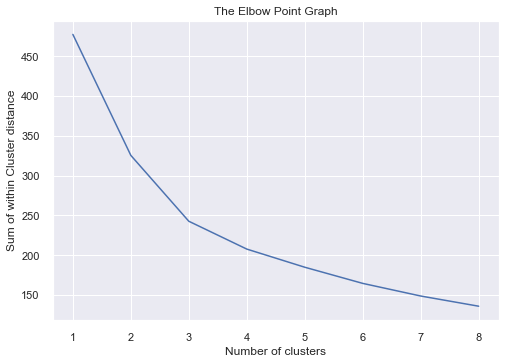

In [34]:
# Plotting the Elbow Graph
sns.set()
plt.plot(range(1,9),swcd)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of within Cluster distance")
plt.show()

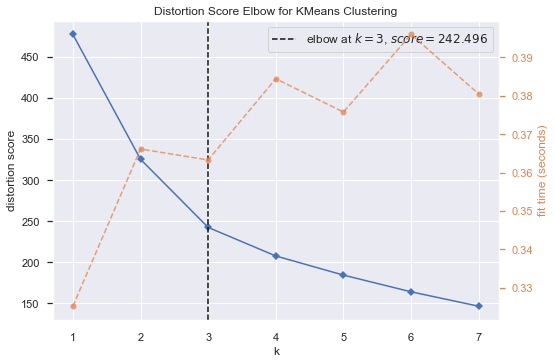

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8)).fit(customer_data_scaled)
visualizer.show()

Taking the Optimum number of clusters as 3

Training the K-Means Clustering Model

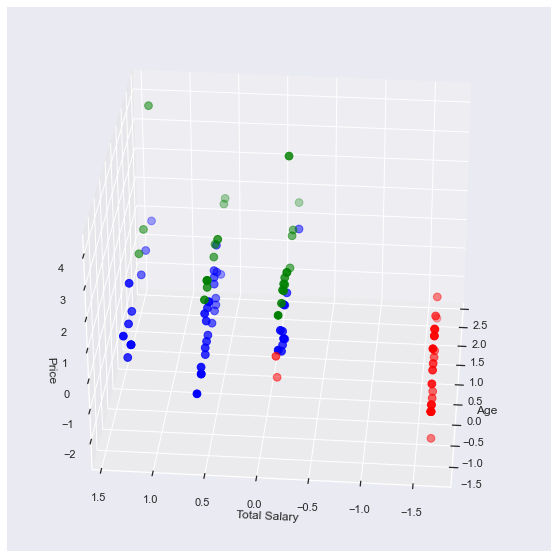

In [36]:
km = KMeans(n_clusters=3, random_state=28)
clusters = km.fit_predict(customer_data_scaled)
customer_data_scaled["Cluster"] = clusters

customer_data_scaled["Cluster"] = clusters

from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customer_data_scaled.Age[customer_data_scaled.Cluster == 0], customer_data_scaled["Total Salary"][customer_data_scaled.Cluster == 0], customer_data_scaled["Price"][customer_data_scaled.Cluster == 0], c='blue', s=60)
ax.scatter(customer_data_scaled.Age[customer_data_scaled.Cluster == 1], customer_data_scaled["Total Salary"][customer_data_scaled.Cluster == 1], customer_data_scaled["Price"][customer_data_scaled.Cluster == 1], c='red', s=60)
ax.scatter(customer_data_scaled.Age[customer_data_scaled.Cluster == 2], customer_data_scaled["Total Salary"][customer_data_scaled.Cluster == 2], customer_data_scaled["Price"][customer_data_scaled.Cluster == 2], c='green', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Total Salary")
ax.set_zlabel('Price')
plt.show()

In [37]:
customer_data_scaled.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price,Cluster
0,-1.498630,1,1,1,-1.406760,1,-1.642313,-0.904843,1
1,-0.211304,1,0,1,-0.258937,1,-0.136859,-0.445579,0
2,1.397855,0,0,0,-0.450240,1,1.368594,0.013685,0
3,0.754191,0,0,1,-0.067633,0,0.615867,0.013685,0
4,-0.854967,1,0,1,0.314975,1,-0.136859,0.932213,2


## Extracting Segments

In [38]:
customer_data_scaled['Cluster'].value_counts() 


0    47
2    28
1    24
Name: Cluster, dtype: int64

We can see that more customers belong to Cluster 0

In [39]:
customer_data_original["Cluster"] = customer_data_scaled["Cluster"]
customer_data_original.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price,Cluster
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000,1
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000,0
2,45,Business,Married,Graduate,4,Yes,1800000,1200000,0
3,41,Business,Married,Post Graduate,3,No,2200000,1200000,0
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000,2


In [40]:
# Segregrating each cluster

Cluster_0 = customer_data_original[customer_data_original.Cluster==0]
Cluster_1 = customer_data_original[customer_data_original.Cluster==1]
Cluster_2 = customer_data_original[customer_data_original.Cluster==2]


In [41]:
[Cluster_0['Age'].value_counts().head(3), 
 Cluster_1['Age'].value_counts().head(3), 
 Cluster_2['Age'].value_counts().head(3),]

[35    8
 36    6
 31    5
 Name: Age, dtype: int64,
 27    6
 30    5
 29    4
 Name: Age, dtype: int64,
 36    6
 44    4
 41    3
 Name: Age, dtype: int64]

<AxesSubplot:xlabel='Cluster', ylabel='count'>

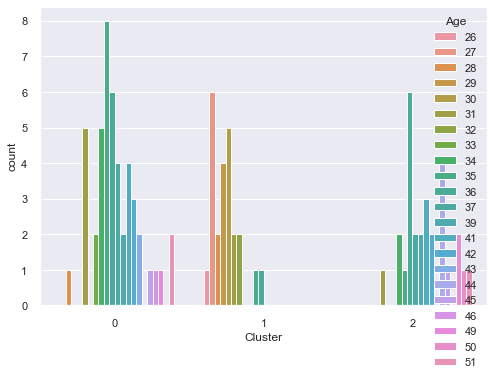

In [42]:
sns.countplot(data=customer_data_original, x="Cluster", hue="Age")

#### People between the age of 27-35 are more interested in EV

In [43]:
[Cluster_0['Education'].value_counts().head(3), 
 Cluster_1['Education'].value_counts().head(3), 
 Cluster_2['Education'].value_counts().head(3),]

[Graduate         24
 Post Graduate    23
 Name: Education, dtype: int64,
 Post Graduate    14
 Graduate         10
 Name: Education, dtype: int64,
 Post Graduate    19
 Graduate          9
 Name: Education, dtype: int64]

<AxesSubplot:xlabel='Cluster', ylabel='count'>

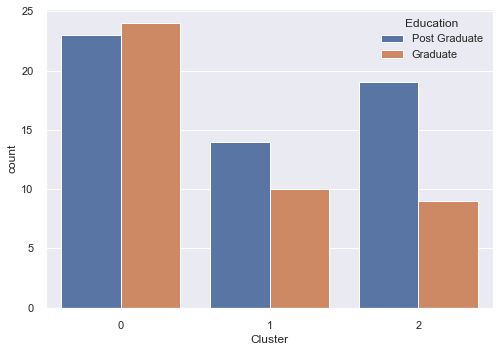

In [44]:
sns.countplot(data=customer_data_original, x="Cluster", hue="Education")

#### Post Graduates are more interested in EV

In [45]:
[Cluster_0['Personal loan'].value_counts().head(3), 
 Cluster_1['Personal loan'].value_counts().head(3), 
 Cluster_2['Personal loan'].value_counts().head(3),]

[No     26
 Yes    21
 Name: Personal loan, dtype: int64,
 No     19
 Yes     5
 Name: Personal loan, dtype: int64,
 No     22
 Yes     6
 Name: Personal loan, dtype: int64]

<AxesSubplot:xlabel='Cluster', ylabel='count'>

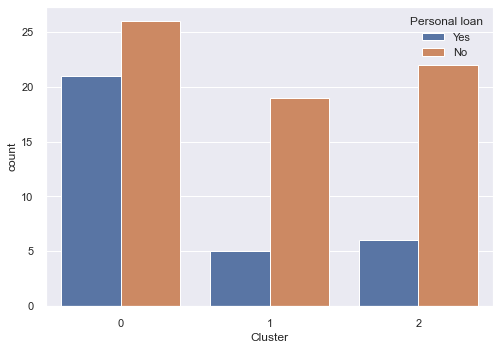

In [46]:
sns.countplot(data=customer_data_original, x="Cluster", hue="Personal loan")

#### People who don't have any personal loan are more interested in EV

In [47]:
[Cluster_0['Marrital Status'].value_counts().head(3), 
 Cluster_1['Marrital Status'].value_counts().head(3), 
 Cluster_2['Marrital Status'].value_counts().head(3),]

[Married    47
 Name: Marrital Status, dtype: int64,
 Single     15
 Married     9
 Name: Marrital Status, dtype: int64,
 Married    28
 Name: Marrital Status, dtype: int64]

<AxesSubplot:xlabel='Cluster', ylabel='count'>

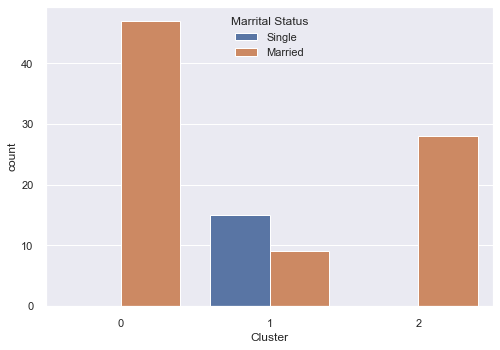

In [48]:
sns.countplot(data=customer_data_original, x="Cluster", hue="Marrital Status")

#### Married people are more interested in EV

In [49]:
[Cluster_0['Profession'].value_counts().head(3), 
 Cluster_1['Profession'].value_counts().head(3), 
 Cluster_2['Profession'].value_counts().head(3),]

[Salaried    27
 Business    20
 Name: Profession, dtype: int64,
 Salaried    15
 Business     9
 Name: Profession, dtype: int64,
 Salaried    22
 Business     6
 Name: Profession, dtype: int64]

<AxesSubplot:xlabel='Cluster', ylabel='count'>

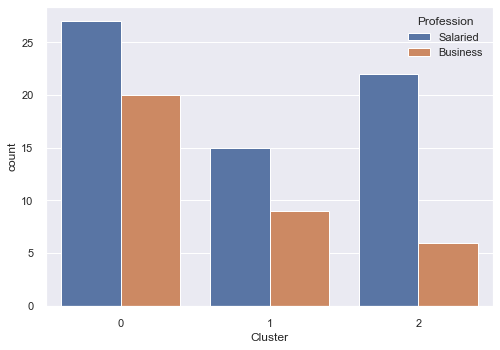

In [50]:
sns.countplot(data=customer_data_original, x="Cluster", hue="Profession")

#### Salaried people are more interested in EV

In [51]:
[Cluster_0['No of Dependents'].value_counts().head(3), 
 Cluster_1['No of Dependents'].value_counts().head(3), 
 Cluster_2['No of Dependents'].value_counts().head(3),]

[3    23
 2    13
 4    11
 Name: No of Dependents, dtype: int64,
 0    22
 2     2
 Name: No of Dependents, dtype: int64,
 2    14
 3    11
 4     3
 Name: No of Dependents, dtype: int64]

<AxesSubplot:xlabel='Cluster', ylabel='count'>

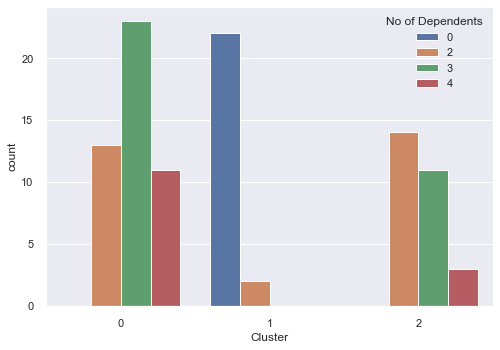

In [52]:
sns.countplot(data=customer_data_original, x="Cluster", hue="No of Dependents")

#### People with more than 3 dependents are more interested in EV

# Conclusion

## Demographic segments:-

### Age
#### -Target Age group of 27-35

### Education
#### -Target Post Graduates.

### Profession
#### -Target Salaried

### Loan Status
#### -Target People with no personal loan

### Marrital Status
#### -Target married